In [3]:
import torch # Root package
import torch.nn as nn # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim # For all Optimization algorithms, SGD, Adam, etc.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import random # random number generation
import sklearn# data preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns # data visualization
import matplotlib.pyplot as plt# data visualization

In [4]:
# Load data from CSV file
data = pd.read_csv('datedata.csv', skiprows = [1], index_col = False)

In [5]:
data

,Date,Open,High,Low,Close
0,01/02/2013,19693.30,19756.68,19686.50,19714.24
1,01/03/2013,19771.03,19786.30,19693.29,19764.78
2,01/04/2013,19782.59,19797.44,19679.99,19784.08
3,01/07/2013,19820.56,19856.43,19654.46,19691.42
4,01/08/2013,19681.38,19761.78,19632.59,19742.52
...,...,...,...,...,...
2554,05/02/2023,61301.61,61486.24,61255.00,61354.71
2555,05/03/2023,61274.96,61274.96,61024.44,61193.30
2556,05/04/2023,61258.13,61797.91,61119.56,61749.25
2557,05/05/2023,61163.10,61585.50,61002.17,61054.29


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2559 entries, 0 to 2558
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2559 non-null   object 
 1   Open    2559 non-null   float64
 2   High    2559 non-null   float64
 3   Low     2559 non-null   float64
 4   Close   2559 non-null   float64
dtypes: float64(4), object(1)
memory usage: 100.1+ KB


In [7]:
# what features we have?
for i in data.columns:
    print(i)

Date
Open
High
Low
Close


In [8]:
data.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [9]:
data['Date'] = pd.to_datetime(data['Date'])# convert to datetime
data['Month'] = pd.DatetimeIndex(data['Date']).month# extract month
data['Day'] = pd.DatetimeIndex(data['Date']).day# extract day
data['Year'] = pd.DatetimeIndex(data['Date']).year# extract year
data.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
Month             int64
Day               int64
Year              int64
dtype: object

In [10]:
data.select_dtypes(include=['object'])

""
0
1
2
3
4
...
2554
2555
2556
2557


Missing values and duplicates check

In [11]:
# check for missing values
data.isna().sum().any()

False

In [12]:
data.duplicated().any()# check for duplicates

False

In [13]:
missing_values = data.isna().sum()# check for missing values
missing_values = missing_values[missing_values > 0]# check for missing values
missing_values# check for missing values

Series([], dtype: int64)

Visualization

In [14]:
# variable plotting

def attribute_plot(data, time, attribute, plot_name):
    plt.figure(figsize=(10,5))
    plt.plot(data[time], data[attribute])
    #labels = data[time]
    #plt.legend()
    plt.xlabel(xlabel=time)
    plt.ylabel(ylabel=attribute)
    #plt.xticks(data[time], labels, rotation='vertical')
    plt.title(label=plot_name)
    plt.grid(True) 
    
# distribution plotting

def distribution(data, attribute, title):
    plt.figure(figsize=(10,5))
    sns.histplot(data[attribute], alpha=0.5)
    plt.axvline(data[attribute].median(), color='r', linestyle='dashed', linewidth=2, label='median value')
    plt.axvline(data[attribute].mean(), color='purple', linestyle='dashed', linewidth=2, label='average value')
    plt.axvline(data[attribute].quantile(0.25), color='r', linestyle='dotted', linewidth=3, label='25% and 75% values')
    plt.axvline(data[attribute].quantile(0.75), color='r', linestyle='dotted', linewidth=3)
    plt.legend()
    plt.title(label=title)
    plt.show()

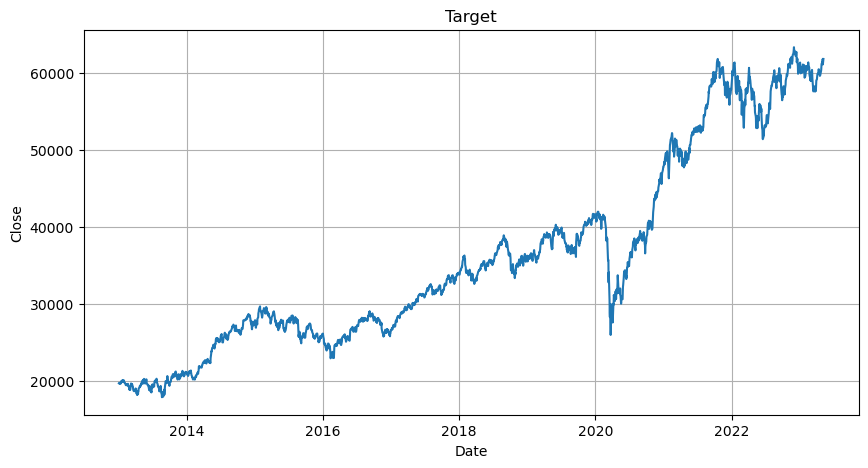

In [15]:
attribute_plot(data, 'Date', 'Close', 'Target')

In [16]:
environmental_features = data[['Date', 'Month', 'Day', 'Year', 'Open', 'High', 'Low', 'Close']]

In [17]:
environmental_features_selected = environmental_features

<AxesSubplot:>

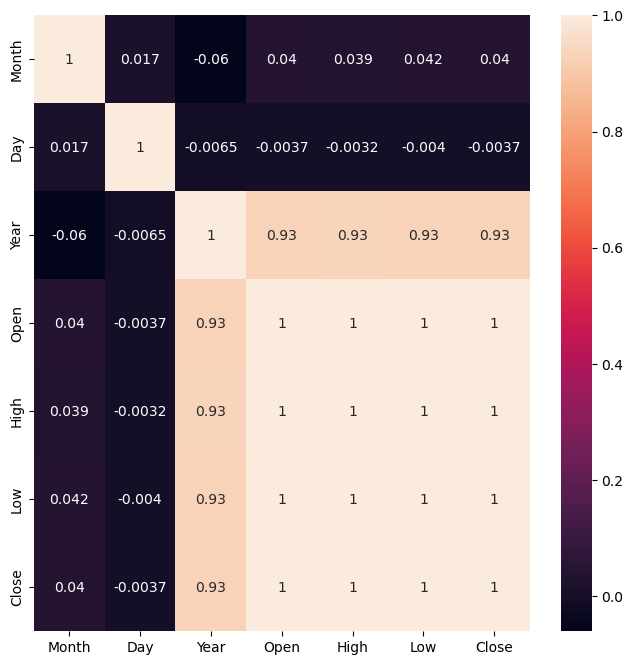

In [18]:
plt.figure(figsize=(8, 8))
corr_matrix = environmental_features.drop(columns = {'Date'}).corr()
sns.heatmap(corr_matrix, annot=True)

In [19]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Month', 'Day', 'Year'], dtype='object')

In [20]:
# Calculate the correlation matrix
corr_matrix = data.corr()

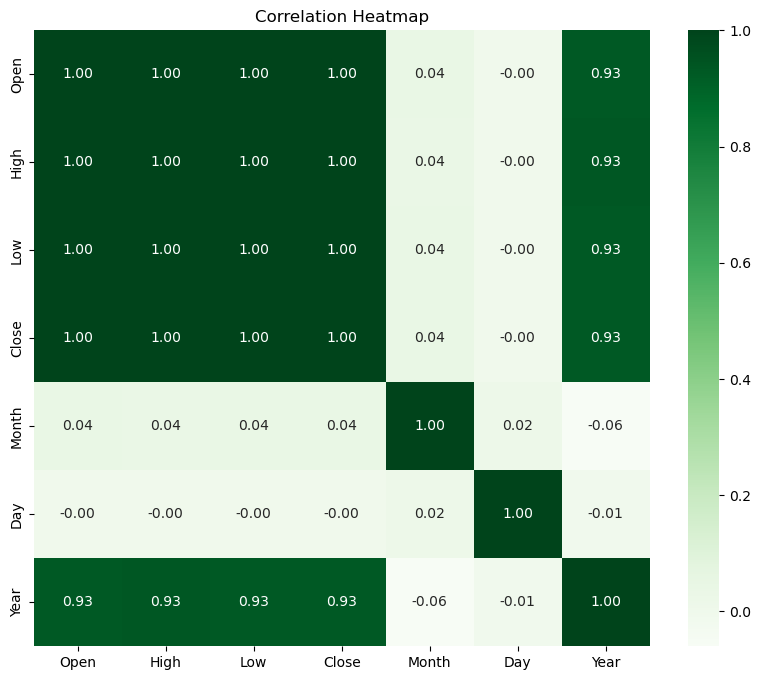

In [21]:
# Create a heatmap with 'Greens' colormap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
# Extract relevant attributes from the data
opens = data['Open'].values# Get open prices
highs = data['High'].values# Get high prices
lows = data['Low'].values# Get low prices
closes = data['Close'].values# Get close prices

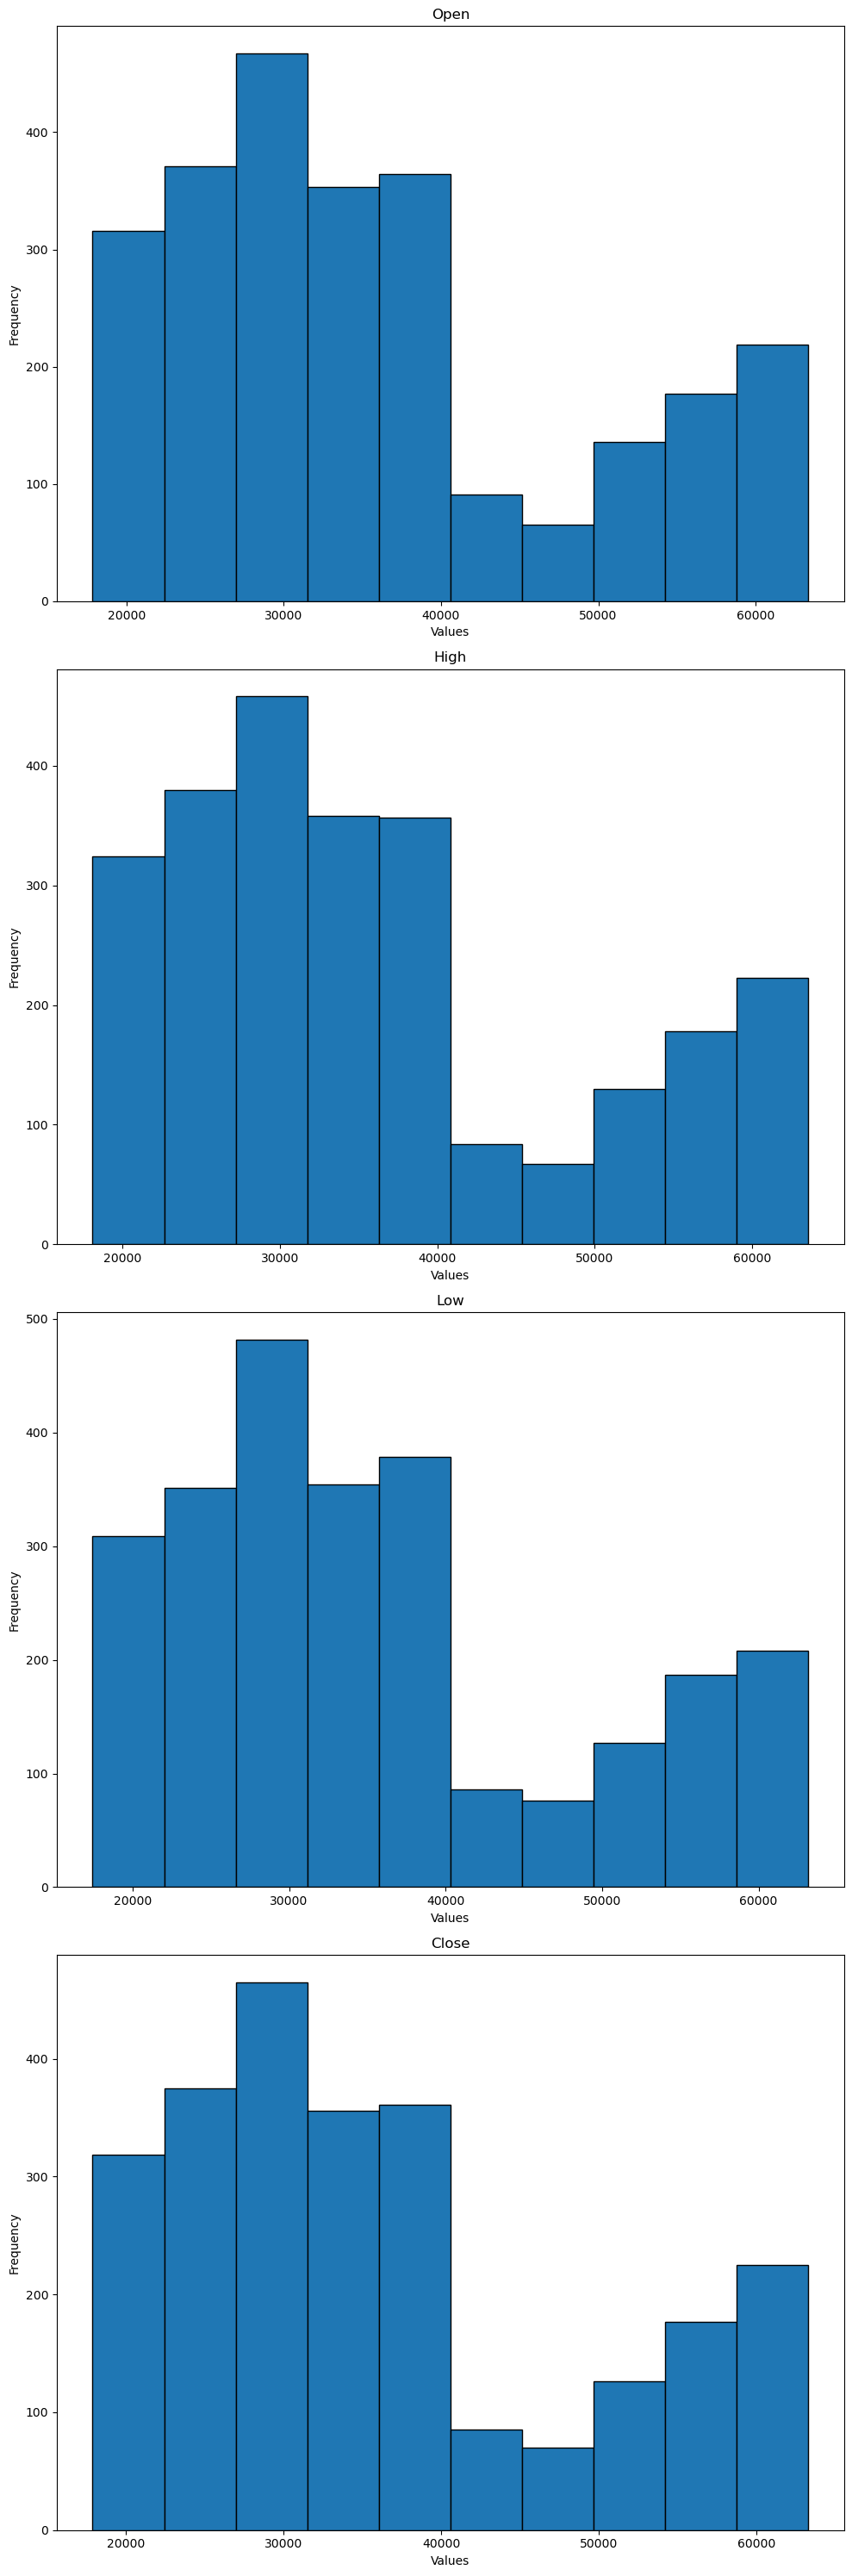

In [23]:
data = environmental_features_selected.drop(columns={'Day', 'Month', 'Year', 'Date'})
# Create a figure and axes
fig, axs = plt.subplots(len(data.columns), 1, figsize=(10, 30))
# Iterate over each column and plot histogram with black border
for i, column in enumerate(data.columns):
    axs[i].hist(data[column], edgecolor='black')
    axs[i].set_xlabel('Values')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(column)

# Show the plot
plt.tight_layout()
plt.show()

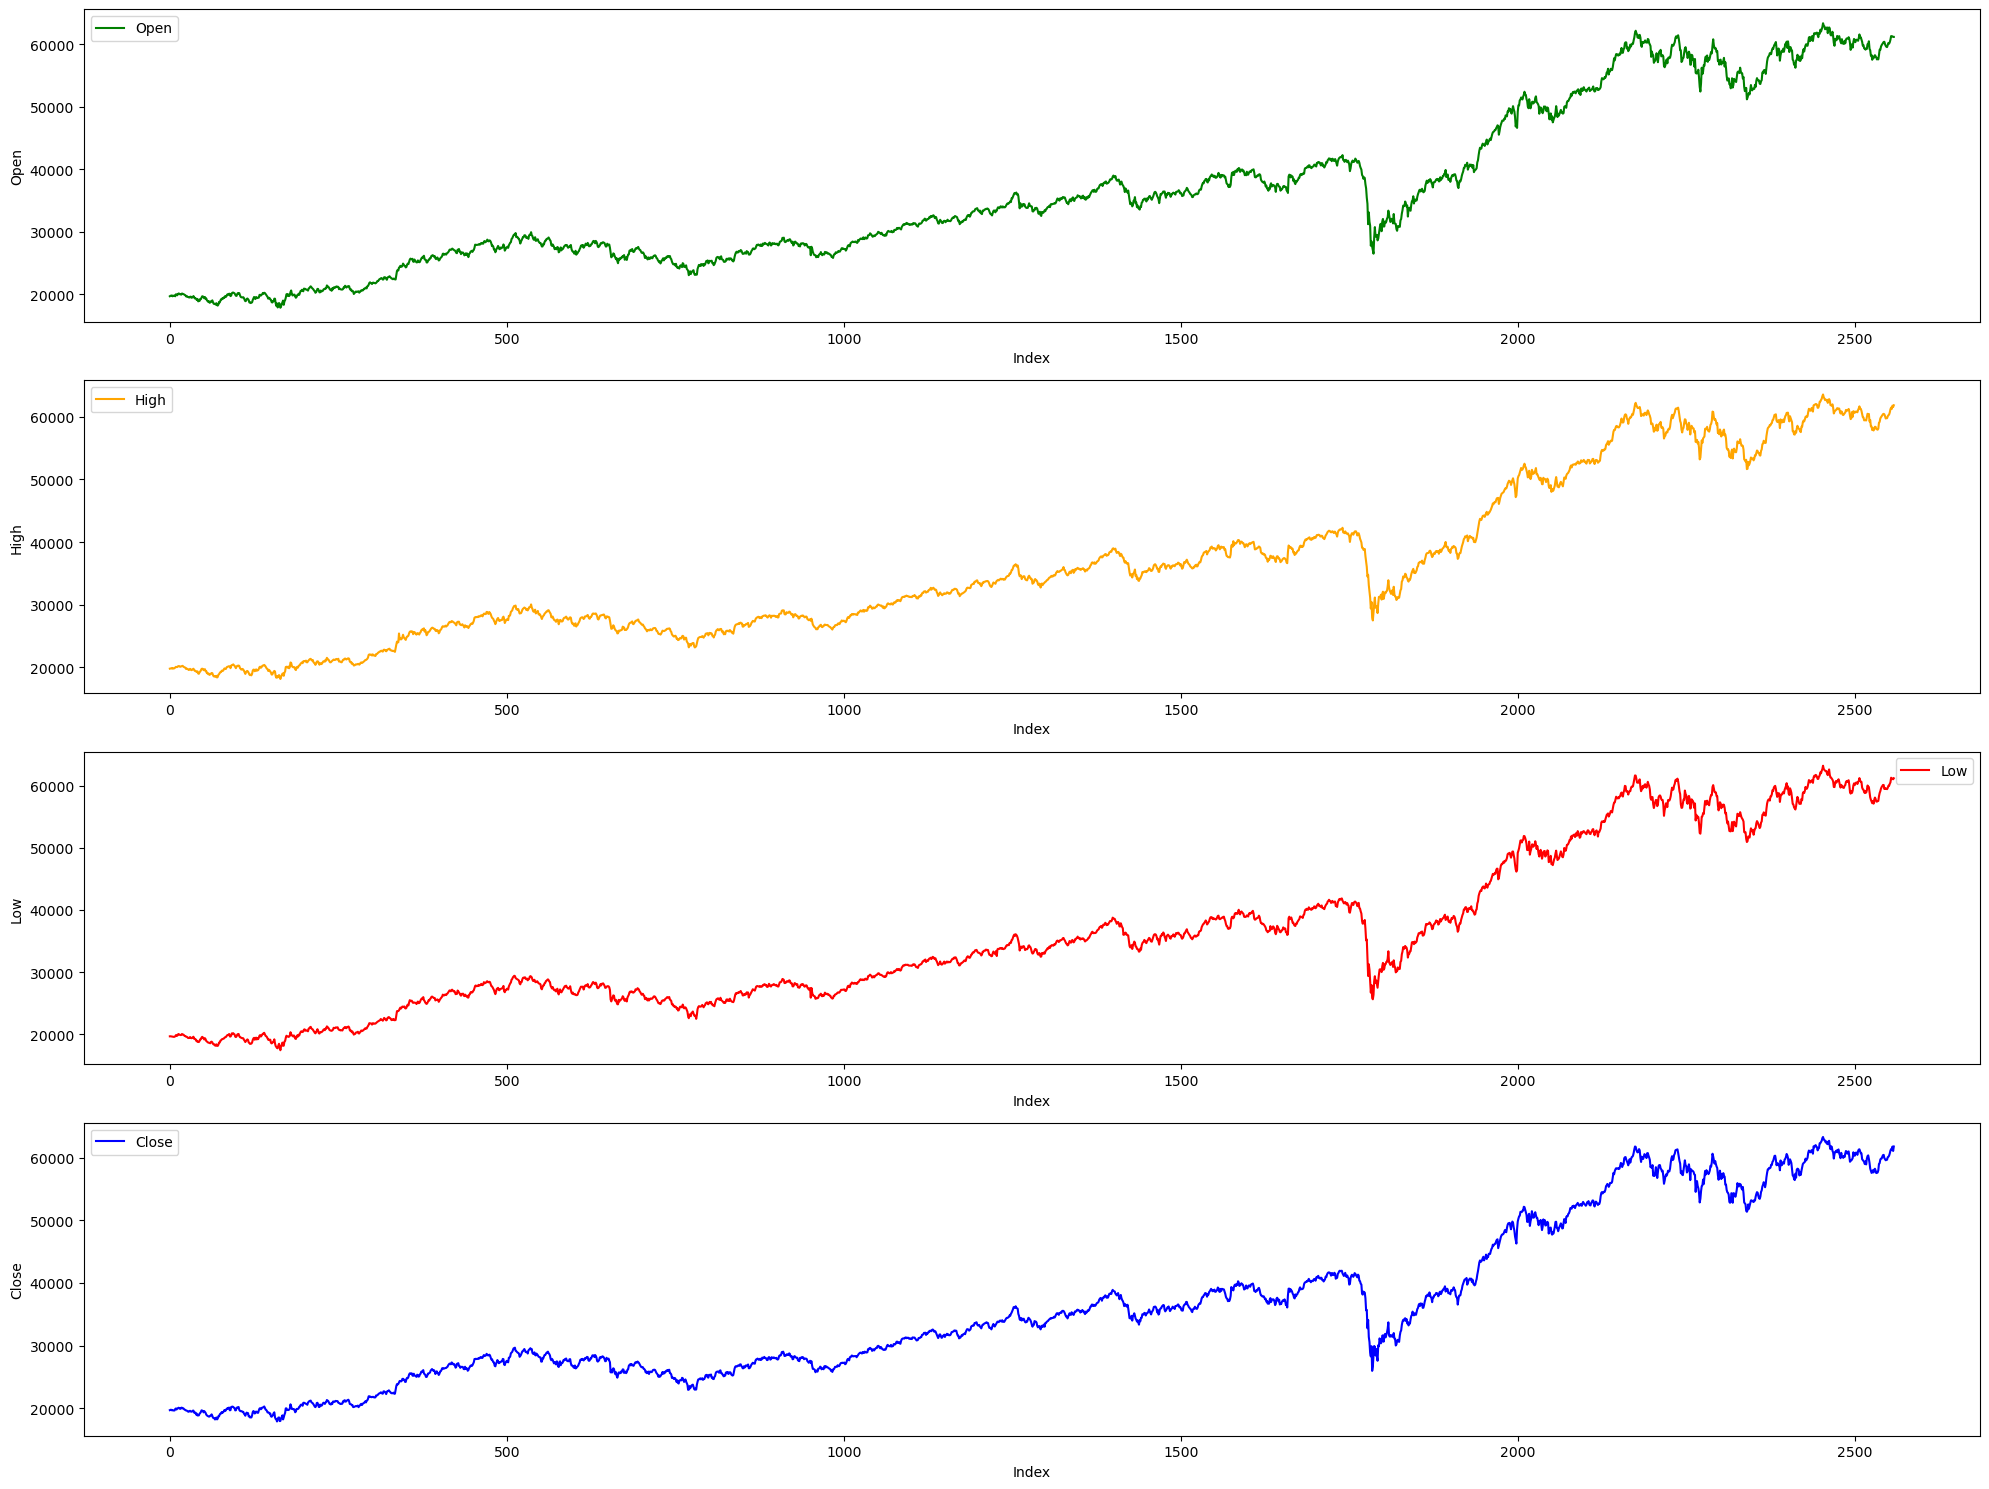

In [24]:
data = environmental_features_selected.drop(columns={'Day', 'Month', 'Year', 'Date'})
# Define colors for each column
colors = ['green', 'orange', 'red', 'blue']
# Define legend labels
labels = ['Open', 'High', 'Low', 'Close']
# Create a figure and axes
fig, axs = plt.subplots(len(data.columns), 1, figsize=(20,15))
# Iterate over each column and plot the data with color and legend
for i, column in enumerate(data.columns):
    axs[i].plot(data[column], color=colors[i % len(colors)], label=labels[i % len(labels)])
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel(column)
    axs[i].spines['left'].set_color('black')
    axs[i].spines['bottom'].set_color('black')
    axs[i].spines['right'].set_color('black')
    axs[i].spines['top'].set_color('black')
    axs[i].tick_params(axis='x', colors='black')
    axs[i].tick_params(axis='y', colors='black')
    axs[i].legend()
# Show the plot
plt.tight_layout()
plt.show()


In [25]:
single_location = environmental_features_selected.drop(columns={'Day'}).set_index('Date')
single_location.head()

,Month,Year,Open,High,Low,Close
Date,,,,,,
2013-01-02,1,2013,19693.30,19756.68,19686.50,19714.24
2013-01-03,1,2013,19771.03,19786.30,19693.29,19764.78
2013-01-04,1,2013,19782.59,19797.44,19679.99,19784.08
2013-01-07,1,2013,19820.56,19856.43,19654.46,19691.42
2013-01-08,1,2013,19681.38,19761.78,19632.59,19742.52


In [26]:
single_location.shape

(2559, 6)

NN

In [27]:
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def select_action(self, state):
        with torch.no_grad():
            q_values = self.forward(state)
            action = torch.argmax(q_values).item()
            if action == 0:
                action_label = "going up"
            else:
                action_label = "going down"
        return action, action_label

# Initialize your model
input_dim = 4  # Assuming you have Date, Open, High, Low as input features
output_dim = 2  # Assuming you have "going up" and "going down" as output labels
model = DQN(input_dim, output_dim)

# Define the optimizer and loss function
learning_rate = 0.001  # Define your desired learning rate
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()

In [28]:
# Define the DQN agent
class DQNAgent:
    def __init__(self, input_dim, output_dim, lr, gamma):# input_dim = 4 (state), output_dim = 2 (left, right)
        self.input_dim = input_dim # 4
        self.output_dim = output_dim # 2
        self.lr = lr # 0.001
        self.gamma = gamma  # 0.99

        self.model = DQN(input_dim, output_dim)# DQN model
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)# Adam optimizer
        self.loss_fn = nn.MSELoss()# MSE loss
    
    def select_action(self, state, epsilon):
        if random.random() < epsilon:
            action = random.randint(0, self.output_dim - 1)  # Choose a random action
        else:
            state = torch.tensor(state, dtype=torch.float32)
            q_values = self.model(state)
            action = torch.argmax(q_values).item()  # Choose the action with the highest Q-value
        return action


    def update_model(self, state, action, reward, next_state, done):# Update the DQN model
        state = torch.tensor(state, dtype=torch.float32)# Convert state from numpy array to PyTorch tensor
        action = torch.tensor(action, dtype=torch.long)# Convert action from numpy array to PyTorch tensor
        reward = torch.tensor(reward, dtype=torch.float32)# Convert reward from numpy array to PyTorch tensor
        next_state = torch.tensor(next_state, dtype=torch.float32)# Convert next state from numpy array to PyTorch tensor
        done = torch.tensor(done, dtype=torch.float32)# Convert done from numpy array to PyTorch tensor

        q_values = self.model(state)# Forward propagation
        next_q_values = self.model(next_state)# Forward propagation

        q_value = q_values[action]# Get Q-value of action
        next_q_value = torch.max(next_q_values)# Get maximum Q-value in next state

        expected_q_value = reward + self.gamma * next_q_value * (1 - done)# Calculate expected Q-value

        loss = self.loss_fn(q_value, expected_q_value)# Calculate MSE loss

        self.optimizer.zero_grad()# Zero gradients
        loss.backward()# Backpropagation
        self.optimizer.step()# Update weights

HyperParameters

In [29]:
# Define hyperparameters and create the DQNAgent instance
input_dim = 4  # Number of features in the state representation
output_dim = 2  # Number of possible actions
lr = 0.001  # Learning rate
gamma = 0.99  # Discount factor

agent = DQNAgent(input_dim, output_dim, lr, gamma)

In [30]:
# Combine attributes into a state representation for each data point
states = np.column_stack((opens, highs, lows, closes))

In [31]:
# Define discount factor
discount_factor = 0.9

# Define the number of episodes
num_episodes = 1500

# Define epsilon parameters
initial_epsilon = 1.0
final_epsilon = 0.1
epsilon_decay_rate = 0.001

accuracy_list = []
loss_list = []

# Training loop
for episode in range(num_episodes):
    # Calculate the current epsilon value
    epsilon = max(final_epsilon, initial_epsilon - episode * epsilon_decay_rate)

    # Fetch the state from the dataset based on the current episode
    state = states[episode]
    done = False

    while not done:
        # Select the action based on the current state and epsilon
        action = agent.select_action(state, epsilon)

        # Fetch the next state from the dataset based on the current episode
        next_state = states[episode + 1]

        # Calculate the reward based on the difference in closing prices
        next_closes = closes[episode + 1]
        reward = next_closes - closes[episode]

        # Placeholder for determining if the episode is done
        done = np.random.choice([True, False])  # Random done flag for demonstration

        # Update the model based on the observed transition
        agent.update_model(state, action, reward, next_state, done)

        # Convert states and actions to tensors
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        next_state_tensor = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)
        action_tensor = torch.tensor(action, dtype=torch.long)

        # Calculate Q-values for the current state
        q_values = agent.model(state_tensor)

        # Calculate the expected Q-value for the next state
        with torch.no_grad():
            next_q_values = agent.model(next_state_tensor)
            max_next_q_value = torch.max(next_q_values)
            expected_q_value = reward + discount_factor * max_next_q_value

        q_value = q_values[0, action_tensor]

        # Calculate the loss
        loss = agent.loss_fn(q_value, expected_q_value)

        # Backward pass and optimization
        agent.optimizer.zero_grad()
        loss.backward()
        agent.optimizer.step()

        # Append training loss to the list
        loss_list.append(loss.item())

        # Calculate accuracy
        predicted_action = torch.argmax(q_values).item()
        accuracy = (predicted_action == action)

        # Append accuracy to the list
        accuracy_list.append(accuracy)

        state = next_state
        
# Update the model based on the observed transition
state_tensor = state_tensor.clone().detach()
next_state_tensor = next_state_tensor.clone().detach()
agent.update_model(state_tensor, action_tensor.item(), reward, next_state_tensor, done)

# Calculate training loss
q_values = agent.model(state_tensor)
next_q_values = agent.model(next_state_tensor)
next_q_value = torch.max(next_q_values)

q_value = q_values[0, action_tensor.item()]
expected_q_value = reward + discount_factor * next_q_value

loss = agent.loss_fn(q_value, expected_q_value)

# Backward pass and optimization
agent.optimizer.zero_grad()
loss.backward()
agent.optimizer.step()

# Print the predicted action
predicted_action = "going up" if predicted_action == 0 else "going down"
print(f"Predicted action: {predicted_action}")

Predicted action: going up


C:\Users\VIRAT\AppData\Local\Temp\ipykernel_15388\773533763.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(state, dtype=torch.float32)# Convert state from numpy array to PyTorch tensor
C:\Users\VIRAT\AppData\Local\Temp\ipykernel_15388\773533763.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  next_state = torch.tensor(next_state, dtype=torch.float32)# Convert next state from numpy array to PyTorch tensor
c:\Users\VIRAT\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([2])). This will likely lead to incorrect results due to broadcasting. Please ensure t

In [32]:

# Calculate overall accuracy and average training loss
overall_accuracy = sum(accuracy_list) / len(accuracy_list)
average_loss = sum(loss_list) / len(loss_list)

# Print the results
print("Overall Accuracy: {:.2f}%".format(overall_accuracy * 100))
print("Average Training Loss: {:.4f}".format(average_loss))

Overall Accuracy: 81.56%
Average Training Loss: 69771.6837


In [33]:
labels = np.where(next_closes > closes, 1, 0)# Calculate labels for the last episode

model loss, line plot, error histogram, actual and predicted line plot
validation score

In [35]:
# Assuming you have the following variables after the training loop:
loss_list  # List of training losses
closes  # Closing prices for each episode
next_closes  # Next closing prices for each episode
predicted_action  # Predicted actions for each episode


'going up'

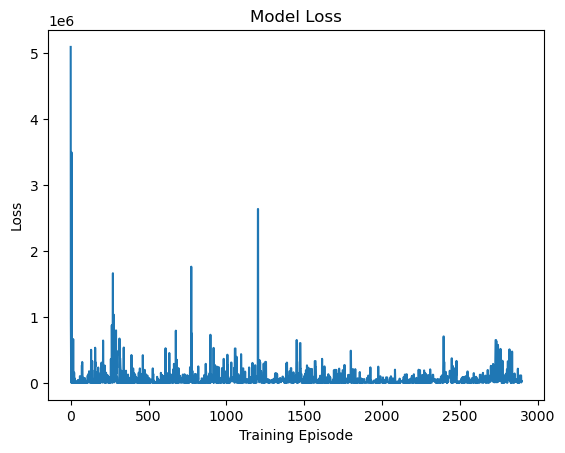

In [36]:
plt.plot(loss_list)
plt.xlabel('Training Episode')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()


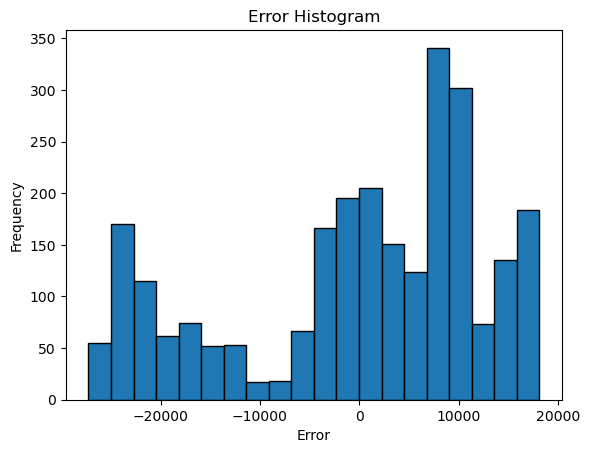

In [39]:
errors = next_closes - closes
plt.hist(errors, bins=20, edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Histogram')
plt.show()

In [40]:
validation_score = 1 - np.mean(errors)
print('Validation Score:', validation_score)

Validation Score: 37.48238374364911
